### Insurance Claims- Fraud Detection

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [148]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [149]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [150]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [151]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [152]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [153]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [154]:
data.shape

(1000, 40)

In [155]:
#we can drop _c39 column
data.drop('_c39', inplace=True, axis=1)

In [156]:
#we can drop policy number column also because policy number has nothing to do with fraud detection
data.drop('policy_number', inplace=True, axis=1)

In [157]:
pd.set_option("display.max_columns", None)
data.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [158]:
for i in data.columns:
    if data.dtypes[i] == np.object:
        print(i + ": " + str(data[i].nunique()))

policy_bind_date: 951
policy_state: 3
policy_csl: 3
insured_sex: 2
insured_education_level: 7
insured_occupation: 14
insured_hobbies: 20
insured_relationship: 6
incident_date: 60
incident_type: 4
collision_type: 4
incident_severity: 4
authorities_contacted: 5
incident_state: 7
incident_city: 7
incident_location: 1000
property_damage: 3
police_report_available: 3
auto_make: 14
auto_model: 39
fraud_reported: 2


In [159]:
#Since all incident locations are different, we can drop incident_location
data.drop('incident_location', inplace=True, axis=1)

In [160]:
#since fraud is not related to policy binding date and incident date, we can drop that column. But we
#can create a new column with difference between binding date and incident date 
from datetime import date

def create_day(dat1, dat2):
    d1 = dat1.split("-")
    d2 = dat2.split("-")
    f_date = date(int(d1[2]), int(d1[1]) ,int(d1[0]))
    l_date = date(int(d2[2]), int(d2[1]) ,int(d2[0]))
    delta = l_date - f_date
    return delta.days

In [161]:
new_col = []
j = 0;
for i in data.policy_bind_date:
    new_col.append(create_day(data.policy_bind_date[j], data.incident_date[j]))
    j = j +1

In [162]:
data["day_diff"] = new_col

In [163]:
data.drop('policy_bind_date', inplace=True, axis=1)
data.drop('incident_date', inplace=True, axis=1)

In [164]:
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,day_diff
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,100
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,3130
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,5282
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,8996
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,256


In [165]:
#we can split the policy_csl to upper and lower
def up_lm(limit):
    return limit.split("/")[1]
def low_lm(limit):
    return limit.split("/")[0]
data['ccsl_l'] = data["policy_csl"].apply(low_lm)
data['ccsl_h'] = data["policy_csl"].apply(up_lm)
data.drop('policy_csl', inplace=True, axis=1)

In [166]:
data

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,day_diff,ccsl_l,ccsl_h
0,328,48,OH,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,100,250,500
1,228,42,IN,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,3130,250,500
2,134,29,OH,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,5282,100,300
3,256,41,IL,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,8996,250,500
4,228,44,IL,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,256,500,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,8622,500,1000
996,285,41,IL,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,384,100,300
997,130,34,OH,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,4358,250,500
998,458,62,IL,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,1196,500,1000


In [167]:
data.collision_type.unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [168]:
# we want to replace the ? in collision type column with mode = Rear Collision
data["collision_type"].replace("?", "Rear Collision", inplace=True)

In [169]:
data.collision_type

0       Side Collision
1       Rear Collision
2       Rear Collision
3      Front Collision
4       Rear Collision
            ...       
995    Front Collision
996     Rear Collision
997     Side Collision
998     Rear Collision
999     Rear Collision
Name: collision_type, Length: 1000, dtype: object

In [170]:
data.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,day_diff,ccsl_l,ccsl_h
0,328,48,OH,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,100,250,500
1,228,42,IN,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,3130,250,500
2,134,29,OH,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,5282,100,300
3,256,41,IL,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,8996,250,500
4,228,44,IL,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,256,500,1000


In [171]:
num_data = data.loc[:,data.dtypes != np.object]

In [172]:
num_data

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,day_diff
0,328,48,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004,100
1,228,42,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007,3130
2,134,29,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007,5282
3,256,41,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014,8996
4,228,44,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,431289,0,0,20,1,0,1,87200,17440,8720,61040,2006,8622
996,285,41,1000,1436.79,0,608177,70900,0,23,1,2,3,108480,18080,18080,72320,2015,384
997,130,34,500,1383.49,3000000,442797,35100,0,4,3,2,3,67500,7500,7500,52500,1996,4358
998,458,62,2000,1356.92,5000000,441714,0,0,2,1,0,1,46980,5220,5220,36540,1998,1196


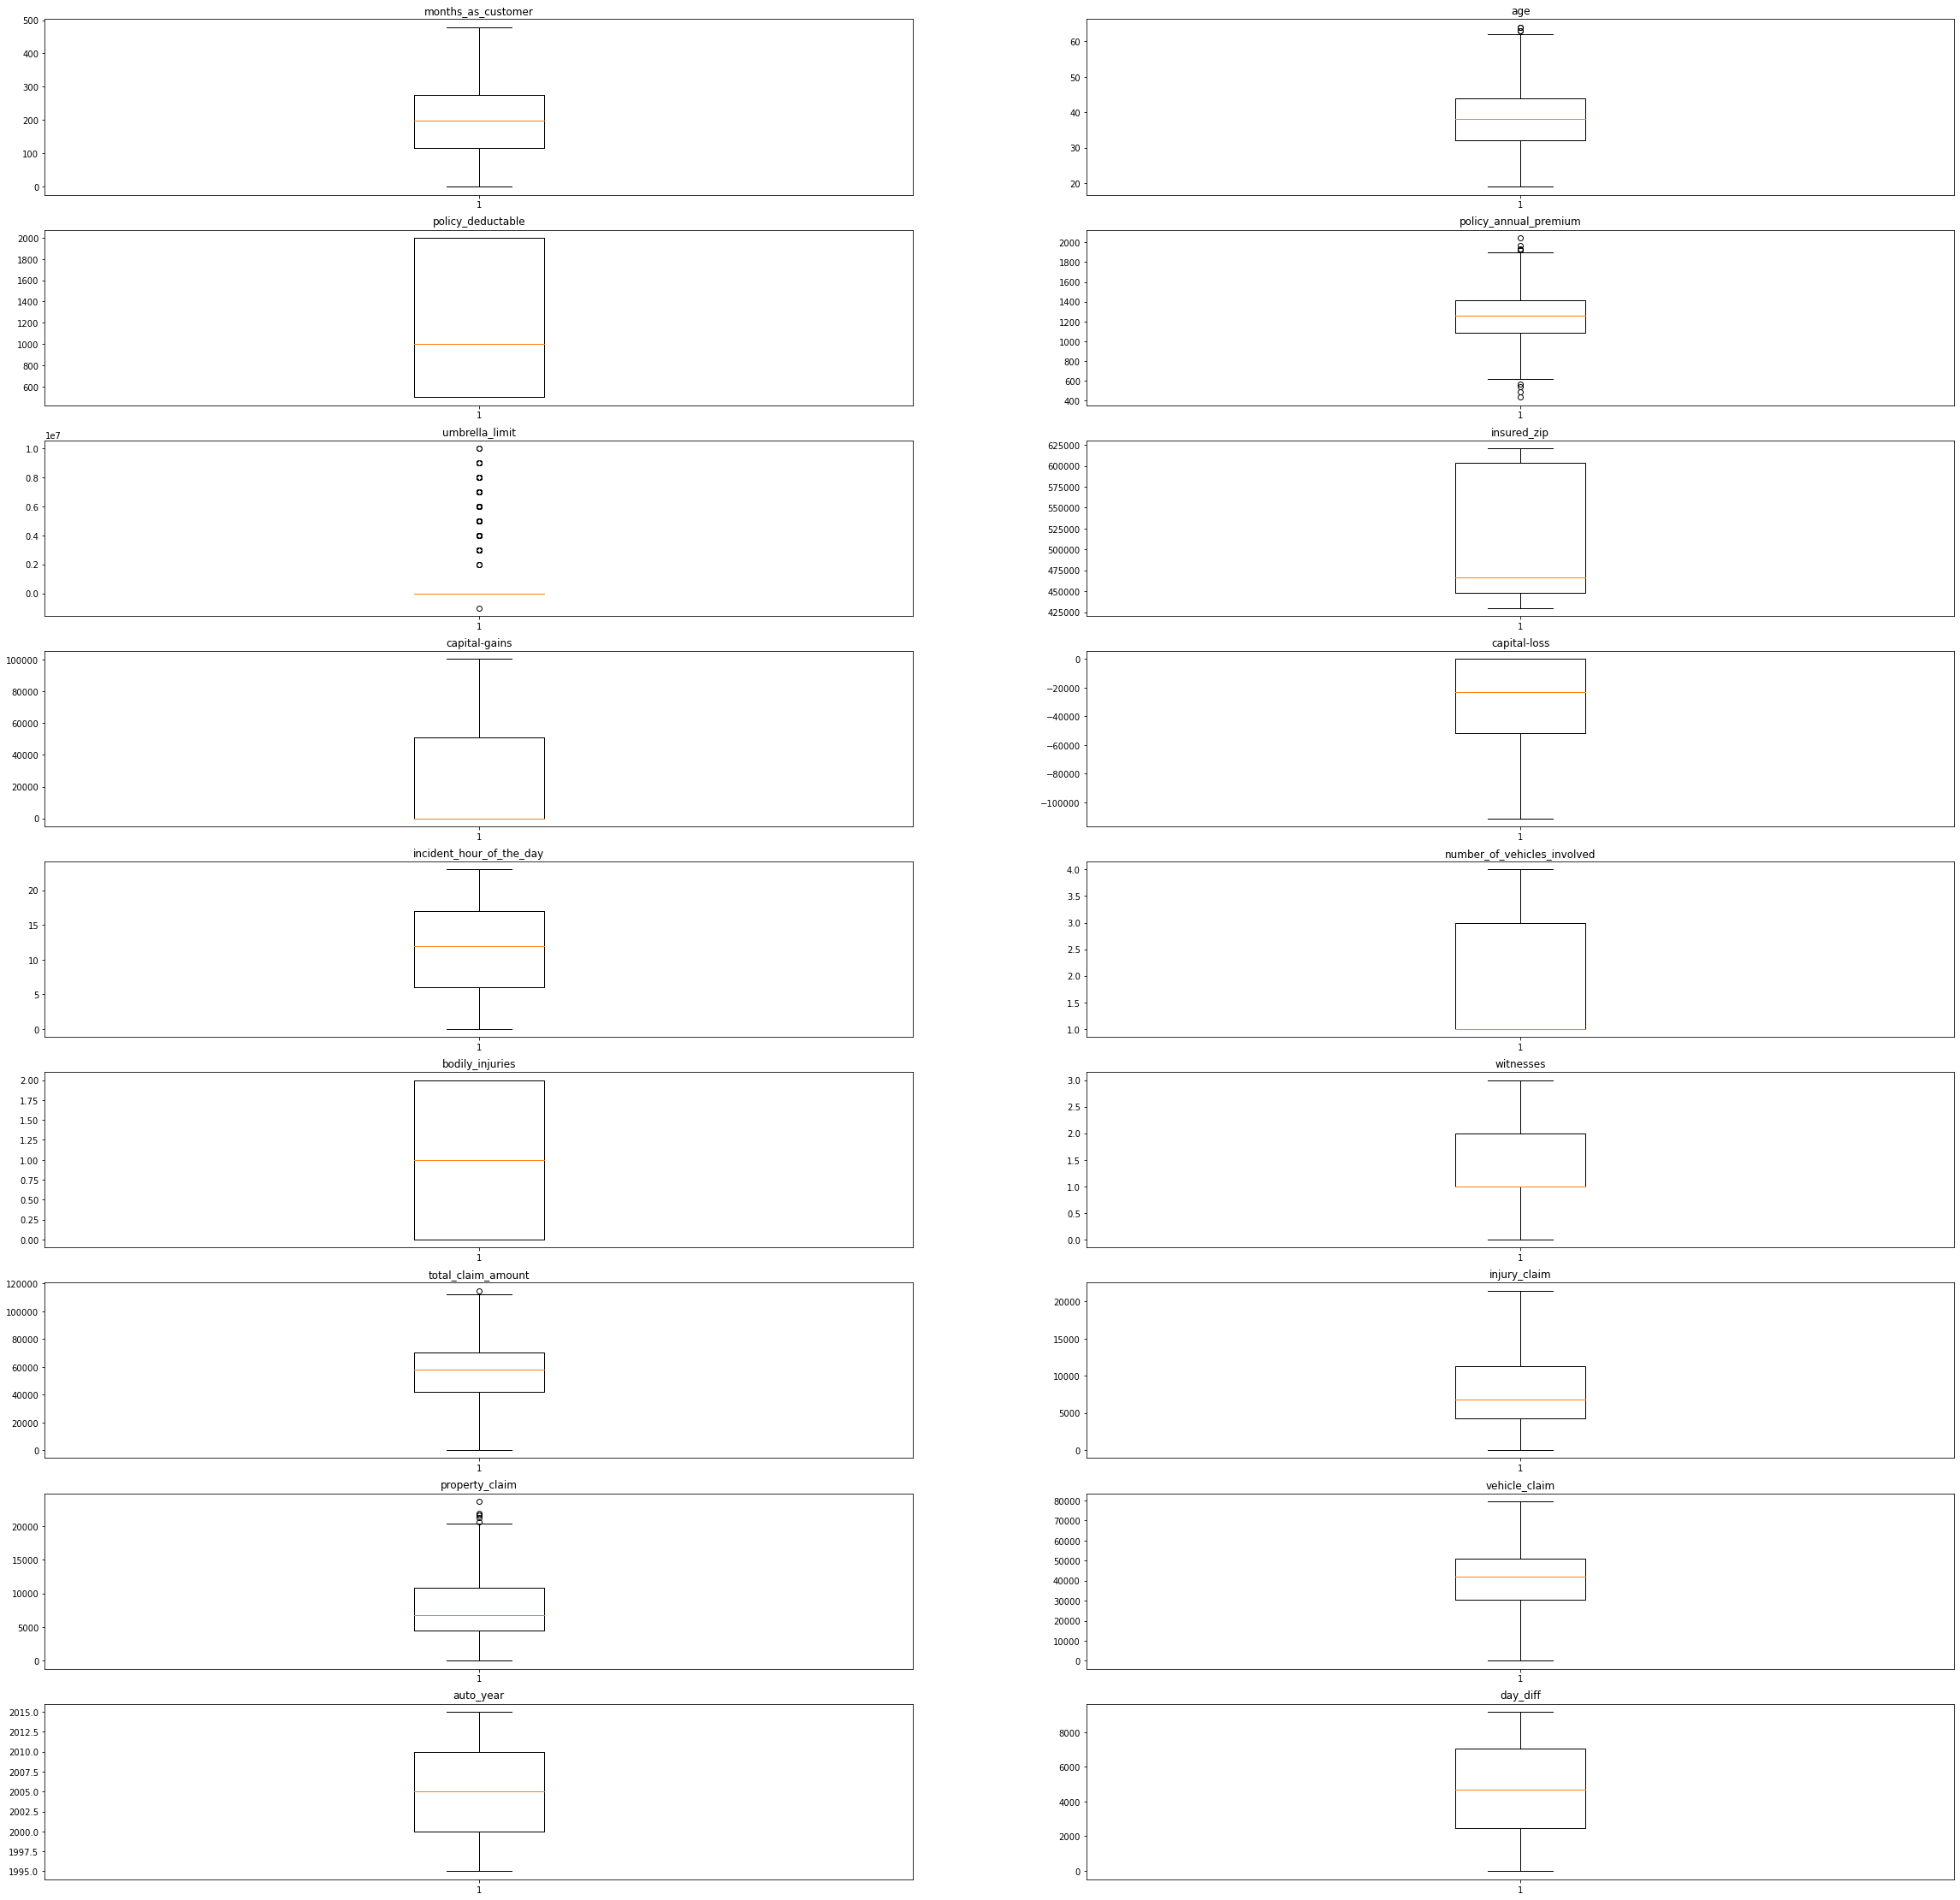

In [173]:
plt.figure(figsize=(40,40))
j = 1
for i in num_data.columns:
    ax = plt.subplot(9, 2, j)
    plt.title(i)
    ax.boxplot(num_data[i])
    j = j + 1

In [174]:
# some outliers are in umbrella limit column. Some 
#other column also have a very small amount of outliers
# we should not remove the outliers in umbrella limit(It can be considered as a catagorical value)

{'whiskers': [<matplotlib.lines.Line2D at 0x2e12811aa90>,
 'caps': [<matplotlib.lines.Line2D at 0x2e126c60340>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e12811a130>],
 'medians': [<matplotlib.lines.Line2D at 0x2e128120640>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e128120d30>],
 'means': []}

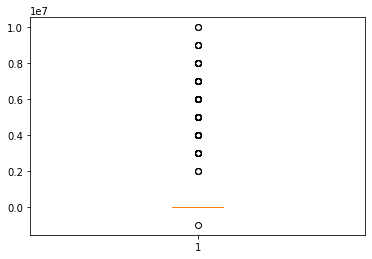

In [175]:
plt.boxplot(data.umbrella_limit)

In [176]:
num_data.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
day_diff                      -0.052754
dtype: float64

In [177]:
#skewness in umbrella limit, insured zip, total claim amount, vehicle claim

[Text(0, 0.5, 'months_as_customer'),
 Text(0, 1.5, 'age'),
 Text(0, 2.5, 'policy_deductable'),
 Text(0, 3.5, 'policy_annual_premium'),
 Text(0, 4.5, 'umbrella_limit'),
 Text(0, 5.5, 'insured_zip'),
 Text(0, 6.5, 'capital-gains'),
 Text(0, 7.5, 'capital-loss'),
 Text(0, 8.5, 'incident_hour_of_the_day'),
 Text(0, 9.5, 'number_of_vehicles_involved'),
 Text(0, 10.5, 'bodily_injuries'),
 Text(0, 11.5, 'witnesses'),
 Text(0, 12.5, 'total_claim_amount'),
 Text(0, 13.5, 'injury_claim'),
 Text(0, 14.5, 'property_claim'),
 Text(0, 15.5, 'vehicle_claim'),
 Text(0, 16.5, 'auto_year'),
 Text(0, 17.5, 'day_diff')]

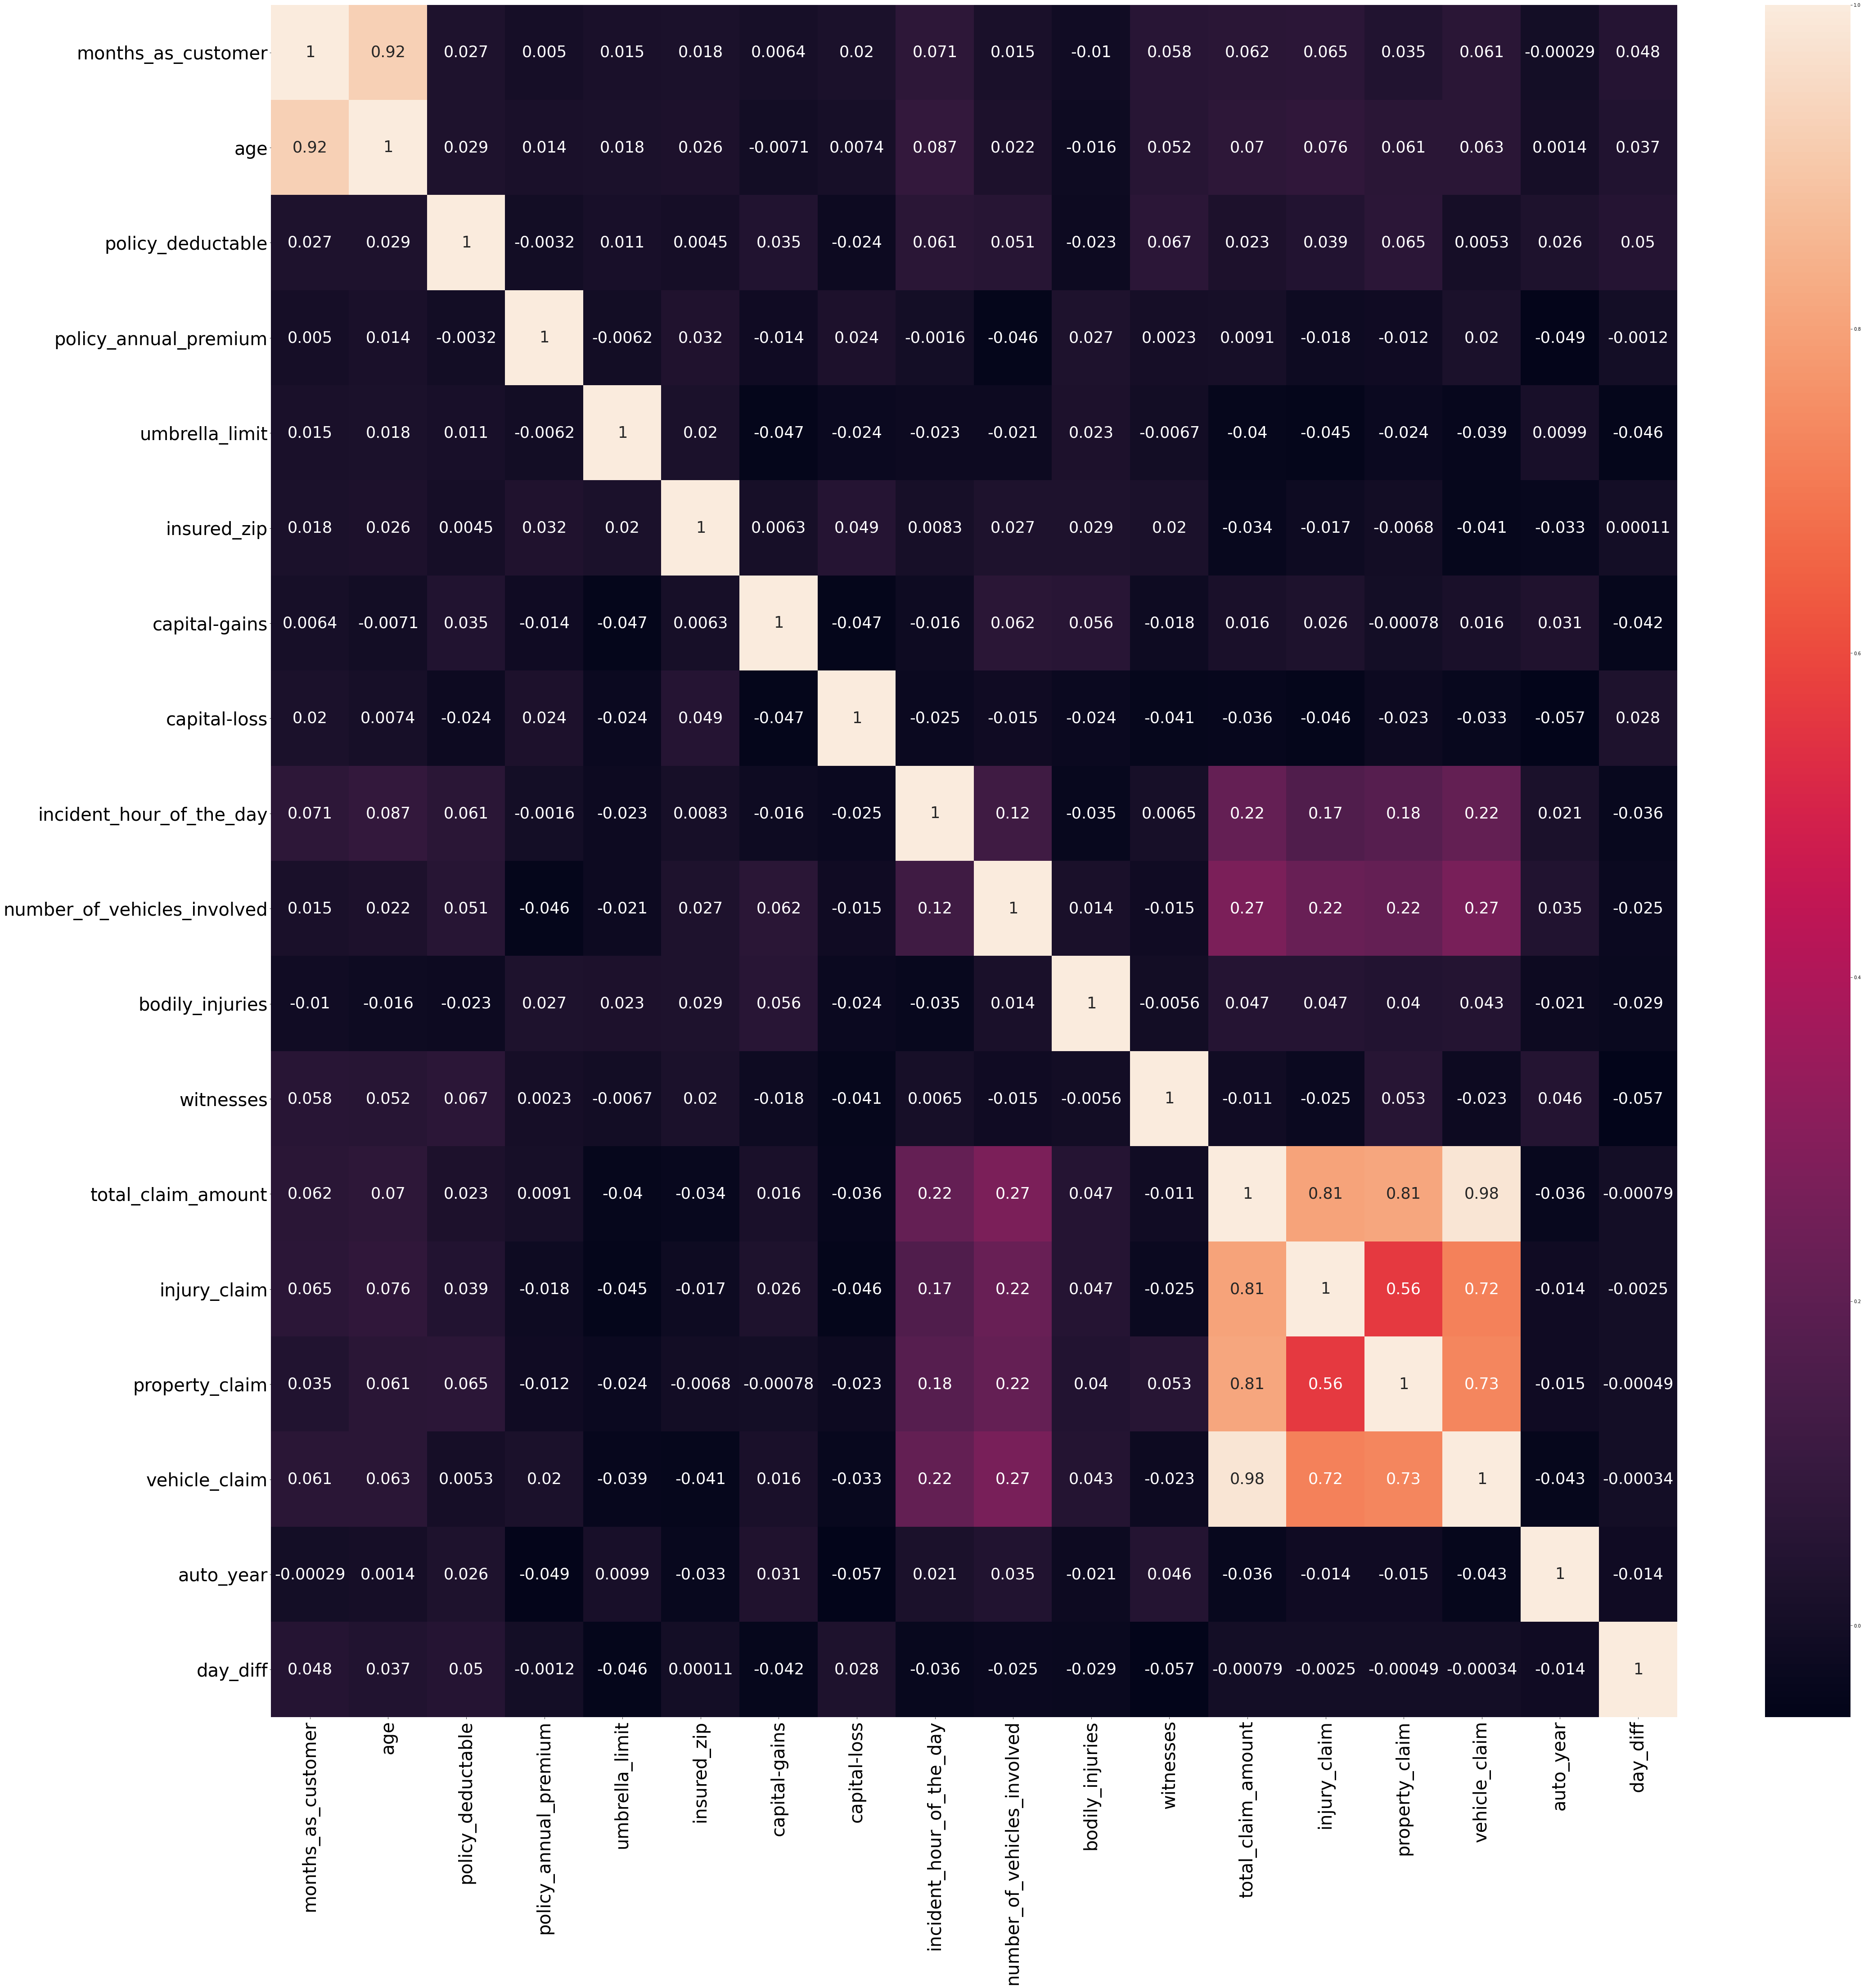

In [178]:
plt.figure(figsize=(70,70))
chart = sns.heatmap(data.corr(), annot=True, annot_kws={'size': 35})
chart.tick_params(labelsize=40)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_yticklabels(chart.get_yticklabels(), rotation=0)

In [179]:
#age and month as a customer are correlated
#vehicle claim and total claim amount are correlated

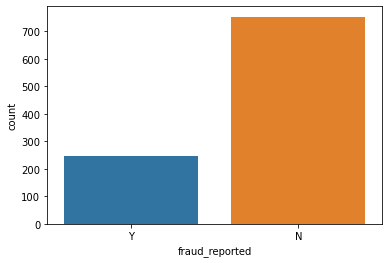

In [180]:
sns.countplot(data.fraud_reported)

In [181]:
# entropy of data is less

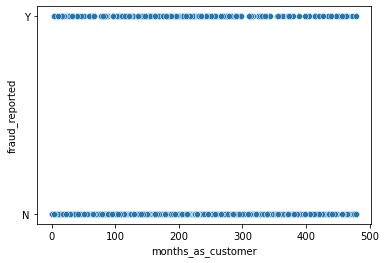

In [182]:
sns.scatterplot(data.months_as_customer, data.fraud_reported)

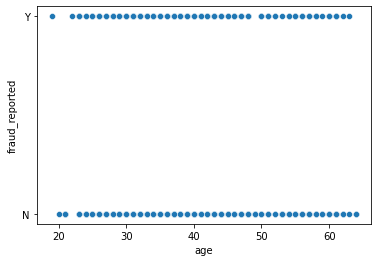

In [183]:
sns.scatterplot(data.age, data.fraud_reported)

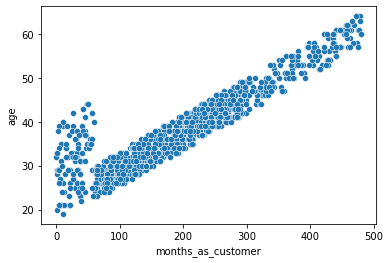

In [184]:
sns.scatterplot(data.months_as_customer, data.age)

In [185]:
data.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,day_diff,ccsl_l,ccsl_h
0,328,48,OH,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,100,250,500
1,228,42,IN,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,3130,250,500
2,134,29,OH,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,5282,100,300
3,256,41,IL,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,8996,250,500
4,228,44,IL,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,256,500,1000


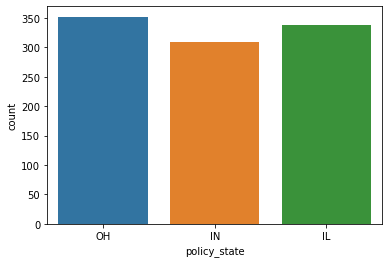

In [186]:
sns.countplot(data.policy_state)

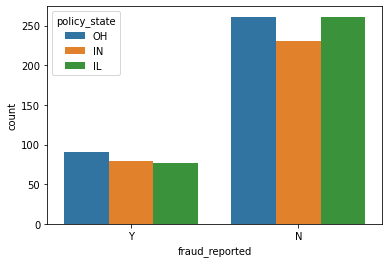

In [187]:
sns.countplot(data.fraud_reported, hue=data.policy_state)

In [188]:
# more reported frauds are from OHIO 

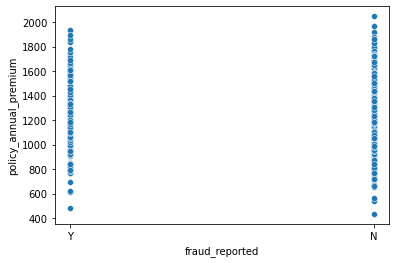

In [189]:
sns.scatterplot(data.fraud_reported, data.policy_annual_premium)

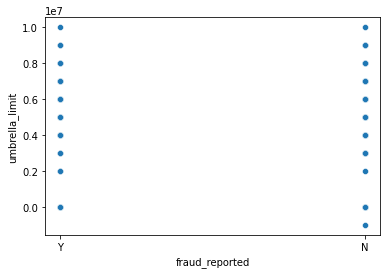

In [190]:
sns.scatterplot(data.fraud_reported, data.umbrella_limit)

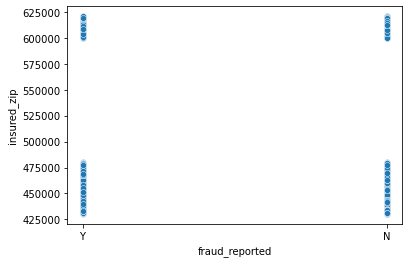

In [191]:
sns.scatterplot(data.fraud_reported, data.insured_zip)

In [192]:
#insured zip, umbrella limit, annual premium have no role in fraud detection

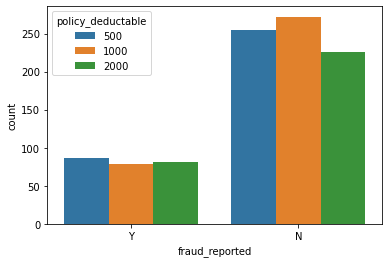

In [193]:
sns.countplot(data.fraud_reported, hue=data.policy_deductable)

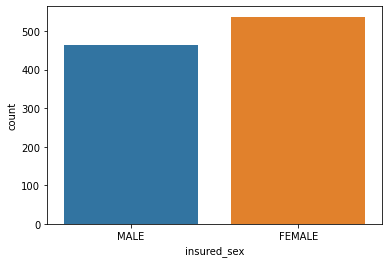

In [194]:
sns.countplot(data.insured_sex)

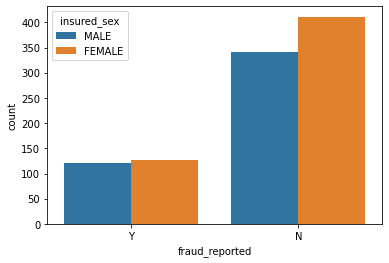

In [195]:
sns.countplot(data.fraud_reported, hue=data.insured_sex)

In [196]:
#we can see that there is a slight increase in female fraudsters, but this might
#be due to the total percentage of females in the dataset 

In [197]:
data.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,day_diff,ccsl_l,ccsl_h
0,328,48,OH,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,100,250,500
1,228,42,IN,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,3130,250,500
2,134,29,OH,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,5282,100,300
3,256,41,IL,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,8996,250,500
4,228,44,IL,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,256,500,1000


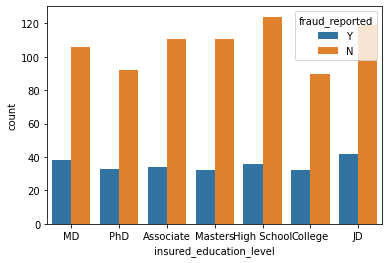

In [198]:
sns.countplot(data.insured_education_level, hue=data.fraud_reported)

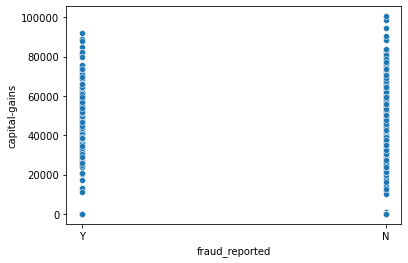

In [199]:
sns.scatterplot(data.fraud_reported, data['capital-gains'])

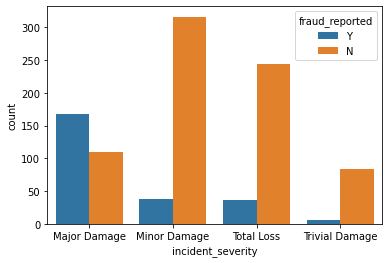

In [200]:
sns.countplot(data.incident_severity, hue=data.fraud_reported)

In [201]:
#Chances of fraud is less when the damage is minor

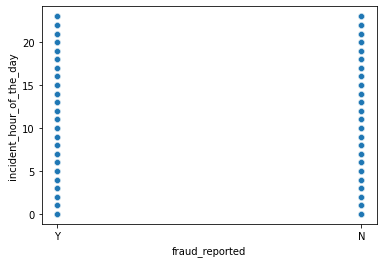

In [202]:
sns.scatterplot(data.fraud_reported, data.incident_hour_of_the_day)

In [203]:
#incident hour has no role

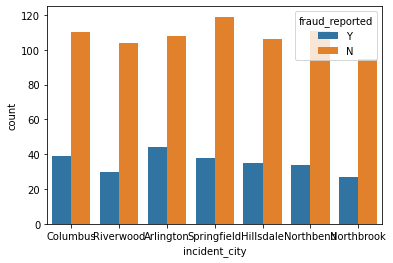

In [204]:
sns.countplot(data.incident_city, hue=data.fraud_reported)

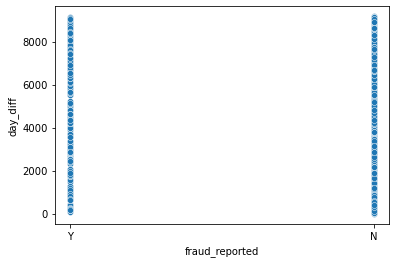

In [205]:
sns.scatterplot(data.fraud_reported, data.day_diff)

In [206]:
#remove skweness
from sklearn.preprocessing import PowerTransformer
columns = ["insured_zip", "total_claim_amount", "vehicle_claim"]
for i in columns:
    pe = PowerTransformer()
    pe.fit(np.array(data[i]).reshape(-1,1))
    data[i] = pe.transform(np.array(data[i]).reshape(-1,1))

In [207]:
data.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.000000
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.510354
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.522718
auto_year                     -0.048289
day_diff                      -0.052754
ccsl_l                         0.410015
ccsl_h                         0.605587
dtype: float64

In [208]:
data.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                    float64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available  

In [209]:
#Kept the column with value "?"" as it is. treating this as unknown
from sklearn.preprocessing import LabelEncoder
cat_cols = ["policy_state", "insured_sex", "insured_education_level", "insured_occupation", 
            "insured_hobbies", "insured_relationship", "incident_type", "collision_type",
            "incident_severity", "authorities_contacted", "incident_state", "incident_city",
           "property_damage", "police_report_available", "auto_make", "auto_model", "fraud_reported"]
for i in cat_cols:
    le = LabelEncoder()
    le.fit(data[i])
    data[i] = le.transform(data[i])

In [210]:
data.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,day_diff,ccsl_l,ccsl_h
0,328,48,2,1000,1406.91,0,0.0,1,4,2,17,0,53300,0,2,2,0,4,4,1,5,1,2,1,2,2,0.715714,6510,13020,0.753697,10,1,2004,1,100,250,500
1,228,42,1,2000,1197.22,5000000,0.0,1,4,6,15,2,0,0,3,1,1,4,5,5,8,1,0,0,0,0,-1.776979,780,780,-1.786629,8,12,2007,1,3130,250,500
2,134,29,2,2000,1413.14,5000000,0.0,0,6,11,2,3,35100,0,0,1,1,4,1,1,7,3,1,2,3,1,-0.716825,7700,3850,-0.820881,4,30,2007,0,5282,100,300
3,256,41,0,2000,1415.74,6000000,0.0,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,5,1,0,1,2,1,0.391426,6340,6340,0.677602,3,34,2014,1,8996,250,500
4,228,44,0,1000,1583.91,6000000,0.0,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,20,1,1,0,1,1,-1.729802,1300,650,-1.740038,0,31,2009,0,256,500,1000


In [211]:
x = data.loc[:, data.columns != 'fraud_reported']

In [212]:
y = data.iloc[:,-4]

In [213]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [214]:
#finding best random state
max_acc = 0
max_rs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = i)
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > max_acc:
        max_acc = acc
        max_rs = i
print("Best random state=",max_rs)

Best random state= 16


In [215]:
# best random state is 16

In [216]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = 16)

In [217]:
models = {"SVC":SVC(),"KNN":KNeighborsClassifier(), "RandomForest":RandomForestClassifier(),"LogisticRegression":LogisticRegression(), "naive":GaussianNB() }
acc = {}
mod_list = []
for i in models:
    mod = i
    mod = models[i]
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    sc = accuracy_score(y_test,pred)
    acc[i] = sc
    mod_list.append(mod)
print(acc)

{'SVC': 0.8227272727272728, 'KNN': 0.7863636363636364, 'RandomForest': 0.8227272727272728, 'LogisticRegression': 0.8227272727272728, 'naive': 0.7863636363636364}


In [218]:
#applying cross validation
from sklearn.model_selection import cross_val_score

In [219]:
cv_list = {}
for i in mod_list:
    cv = cross_val_score(i, x, y, cv=7)
    cv_list[str(i)] = cv.mean()
print(cv_list)

{'SVC()': 0.7530005206061542, 'KNeighborsClassifier()': 0.7180073447679082, 'RandomForestClassifier()': 0.7720518917702016, 'LogisticRegression()': 0.7540065568234582, 'GaussianNB()': 0.7390145066201403}


In [221]:
#RandomForest is the best algorithm
from sklearn.model_selection import GridSearchCV

In [222]:
parameters = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [223]:
GCV = GridSearchCV(RandomForestClassifier(), parameters, cv=6)

In [224]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=6, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]})

In [225]:
GCV.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [226]:
GCV_predict = GCV.best_estimator_.predict(x_test)

In [227]:
accuracy_score(y_test, GCV_predict)

0.8090909090909091

In [230]:
#Accuracy is around 81%

In [228]:
import joblib

In [229]:
joblib.dump(GCV.best_estimator_, "Insurance-Fraud.obj")

['Insurance-Fraud.obj']